# **Ekstrasi Garis Pantai Pada Citra Satelit Landsat Dengan Metode Segmentasi dan Deteksi Tepi**

Proyek ini menggunakan citra satelit Landsat yang difokuskan pada Pantai Bakaro, Papua Barat. Prosesnya meliputi pra-pemrosesan citra (pengurangan noise, peningkatan tepi) dan pemrosesan utama (konversi warna, pengaturan ambang batas, dan deteksi tepi) untuk secara otomatis memetakan batas darat dan laut.

In [ ]:
# memanggil modul
import cv2
import numpy as np
from PIL import Image  #manipulasi gambar menggunakan PIL/Pillow
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from google.colab.patches import cv2_imshow #memanggil fungsi google colab untuk perbaikan cv2.imshow


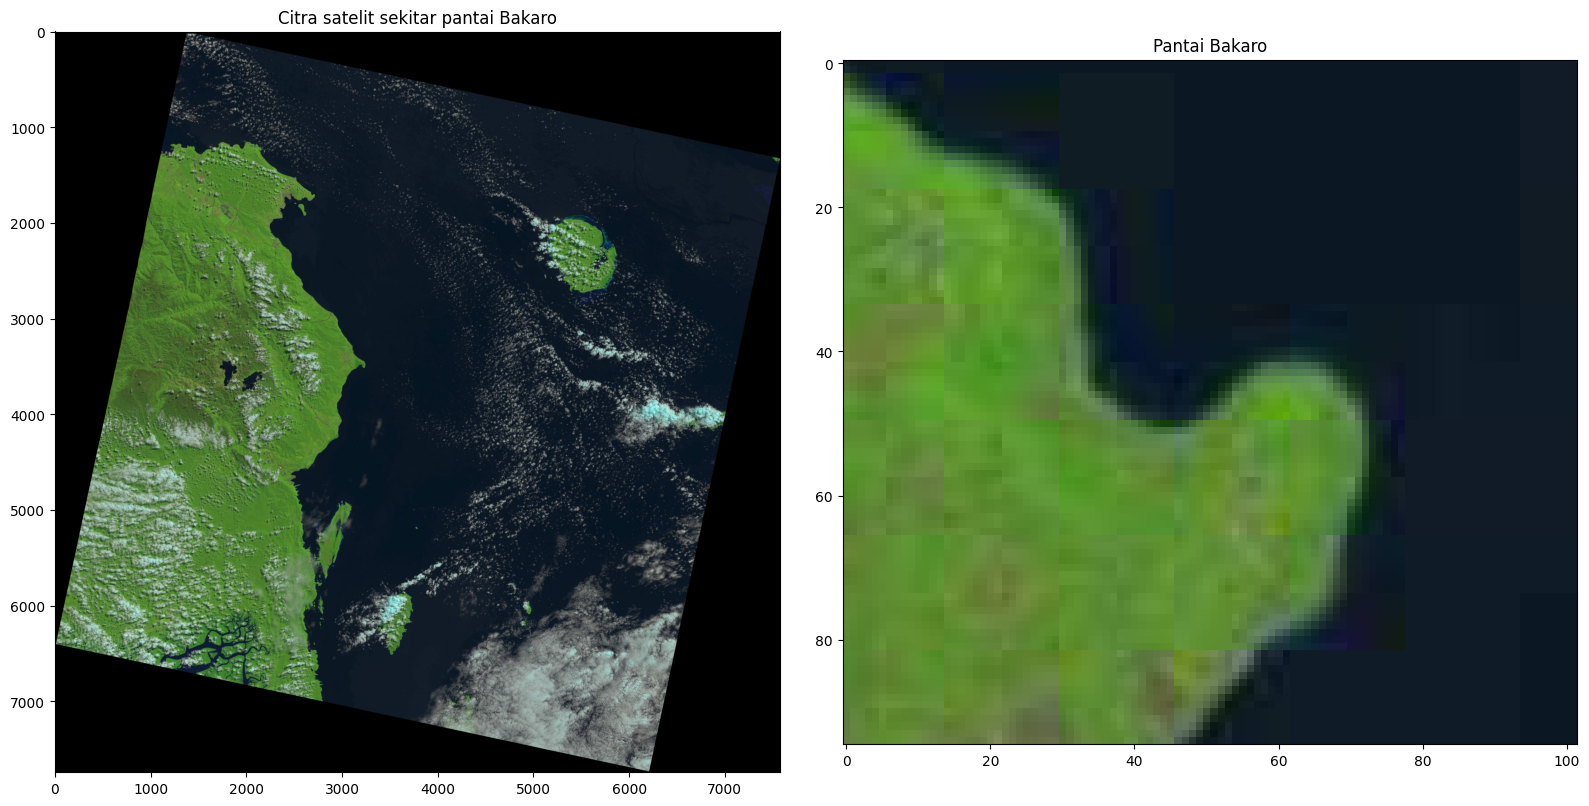

In [ ]:
#melakukan penyelarasan dengan memotong bagian lain sehingga citra hanya fokus ke pantai bakaro saja

image_object = Image.open('pantai.tif')

crop_img = image_object.crop((2642, 1662, 2744, 1757))
crop_img.save('cropped.jpg')


fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

#melihat gambar awal
ax[0].imshow(image_object),ax[0].set_title('Citra satelit sekitar pantai Bakaro')

#melihat hasil crop
ax[1].imshow(crop_img),ax[1].set_title('Pantai Bakaro')
plt.show()

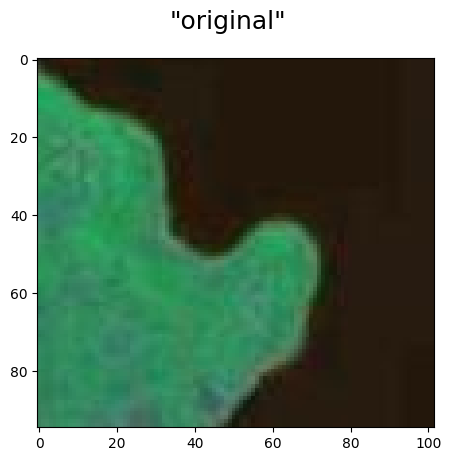

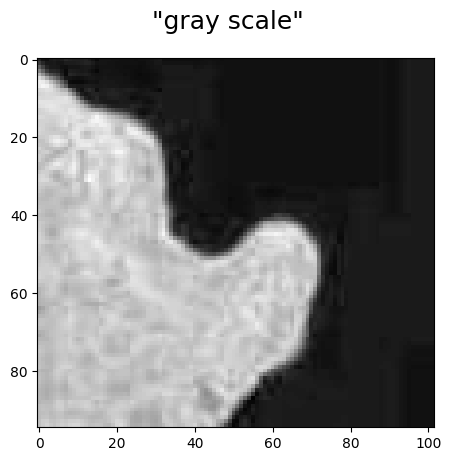

In [ ]:
#melakukan transformasi colorspace
image = cv2.imread("cropped.jpg")
fig1 = plt.figure()
fig1.suptitle('"original"', fontsize=18)
plt.imshow(image)
fig1 = plt.figure()
fig1.suptitle('"gray scale"', fontsize=18)
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')

**melakukan pengolahan (pre-processing) citra**


---


Pre-processing merupakan tahapan awal dari proses ekstraksi garis pantai yang berfokus pada perbaikan kualitas citra satelit baik untuk noise reduction maupun pada edge enhancement.

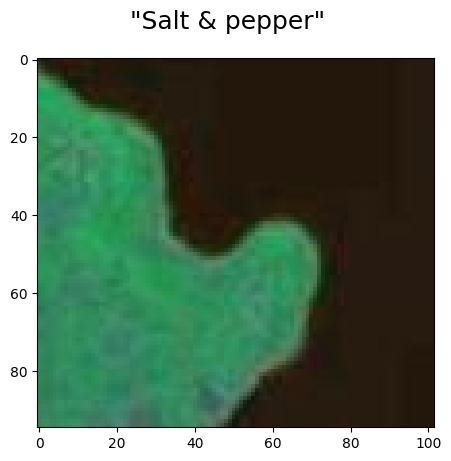

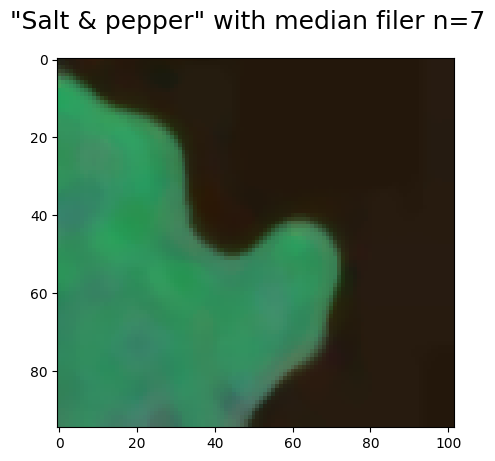

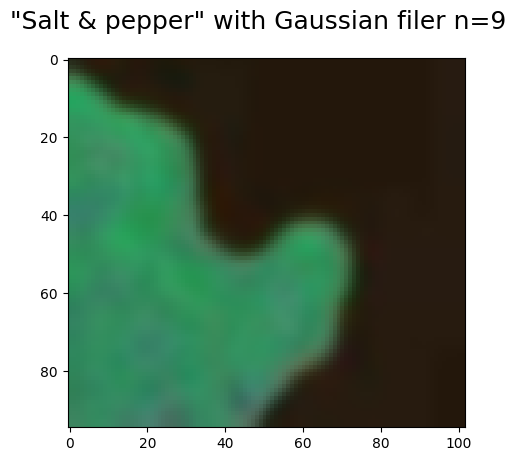

In [ ]:
#menggunkan median filter and gaussian filter untuk menghilangkan salt & pepper noise pada citra
image = cv2.imread("cropped.jpg")

fig1 = plt.figure()
fig1.suptitle('"Salt & pepper"', fontsize=18)
plt.imshow(image)

fig2 = plt.figure()
fig2.suptitle('"Salt & pepper" with median filer n=7', fontsize=18)
plt.imshow(cv2.medianBlur(image,7))
fig3 = plt.figure()
fig3.suptitle('"Salt & pepper" with Gaussian filer n=9', fontsize=18)
plt.imshow(cv2.GaussianBlur(image,(9,9),0))

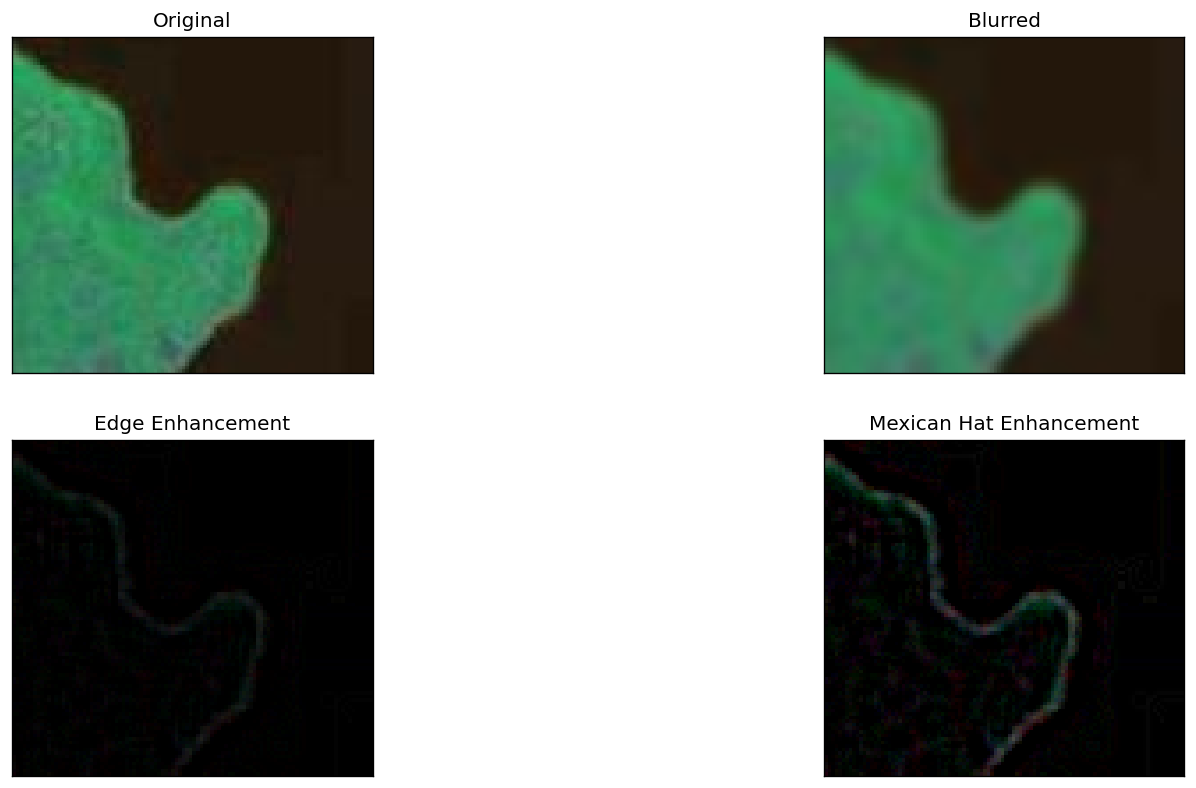

In [ ]:

# 3x3 linear smoothing filter In image processing these sorts of filters are often used for blurring
Sharp_kernel  = np.array([[-1, -1, -1], [-1,  8, -1], [-1, -1, -1]])
sharpen_filter = np.array([[0,0,-1,0,0],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
low_pass_kernel = np.ones((5,5),np.float32)/25
lena_blurred= cv2.filter2D(image, -1, low_pass_kernel)


sharpen1 = cv2.filter2D(lena_blurred, -1, Sharp_kernel )
sharpen2 =  cv2.filter2D(lena_blurred, -1, sharpen_filter  )


titles = ["Original", "Blurred",  "Edge Enhancement","Mexican Hat Enhancement"]
imdic = [ image, lena_blurred, sharpen1 , sharpen2]
figure(figsize=(16,8), dpi=120)
for i in range(4):

    plt.subplot(2,2,i+1)

    plt.imshow(imdic[i], "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()


**Prossesing**

---
Tahapan processing merupakan tahapan utama pada sistem, yang dibagi menjadi konversi RGB, thresholding dan edge detection


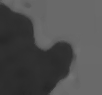

Menghasilkan Kawasan hitam pekat sebagai kawasan daratan dan warna abu-abu sebagai kawasan lautan


In [ ]:
#untuk medianfilter lebih baik dibandingkan gaussian filtering

#Selanjutnya melakukan konversi RGB
Medianfilter= cv2.medianBlur(image,7)
# konversi RGb dari variable img ke colorspace HSV
hsv = cv2.cvtColor(Medianfilter, cv2.COLOR_BGR2HSV);
# memisahkan hue, saturation dan value
h, s, v = cv2.split(hsv)

# menampilkan band hue
cv2_imshow(h)

print("Menghasilkan Kawasan hitam pekat sebagai kawasan daratan dan warna abu-abu sebagai kawasan lautan")

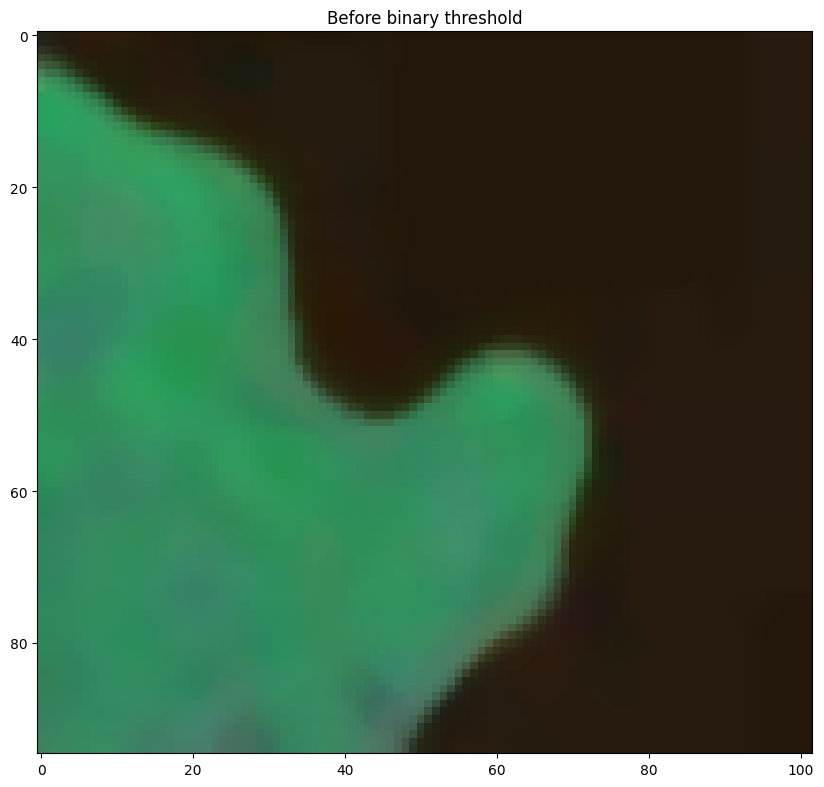

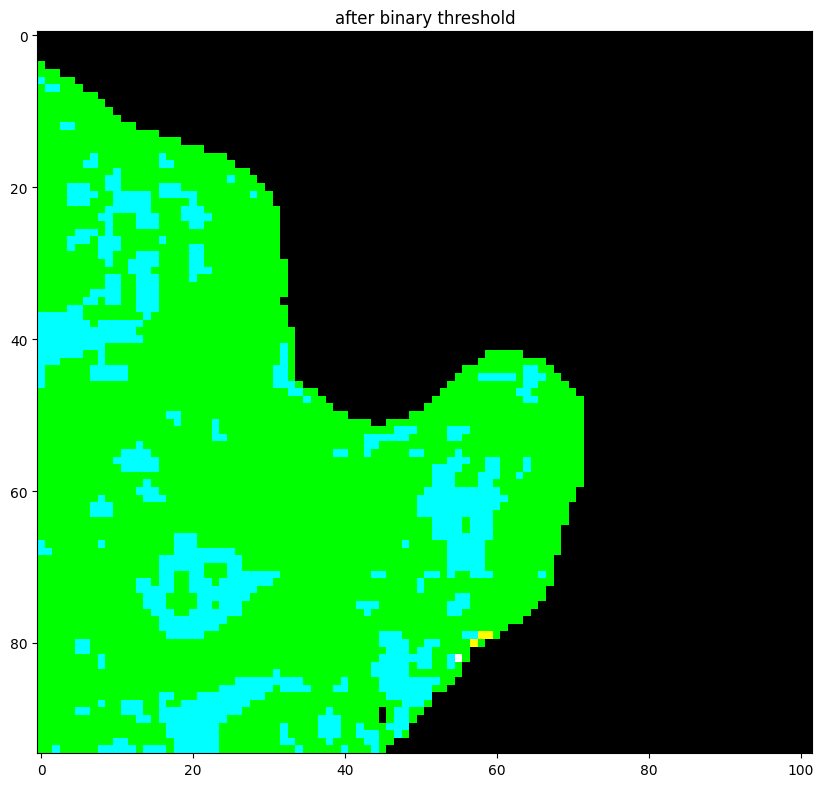

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Before binary threshold")
plt.imshow(Medianfilter)
ret,image=cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10, 10))
plt.title("after binary threshold")
plt.imshow(image)

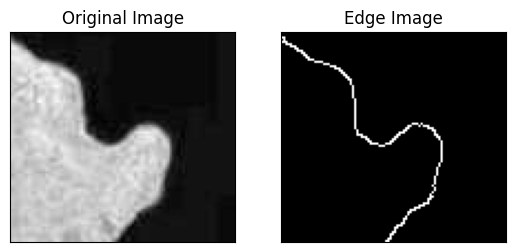

In [ ]:
#menerapkan algoritma fungsi deteksi tepi yaitu canny edges
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('cropped.jpg',0)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


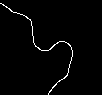

Jumlah kontur yang berhasil dideteksi = 1


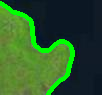

In [ ]:
#kontur pada sebuah Citra dibuat sebagai hasil dari deteksi tepi menggunakan Canny Edge.
# gambar berwarna untuk diplot
img_ori = cv2.imread('cropped.jpg')

# grayscale untuk diolah
img = cv2.imread('cropped.jpg',0)

# Menerapkan Gaussian filtering sebelum Otsu’s thresholding
blur = cv2.GaussianBlur(img,(5,5),0)

# Otsu
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Menggunakan Canny Edge untuk deteksi tepi
edged = cv2.Canny(th3, 30, 200)

# mencari kontur
contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2_imshow(edged)

print("Jumlah kontur yang berhasil dideteksi = " + str(len(contours)))

# Gambar kontur yang dideteksi
# -1 artinya gambar semua kontur yang ditemukan
cv2.drawContours(img_ori, contours, -1, (0, 255, 0), 3)

cv2_imshow(img_ori)